In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
Data = pd.read_excel('RPAmodelUse.xlsx')
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
0,2021-10-03,Sunday,2563,3992,2159,2283,1908,0,0,4262,2114,1908,3840,631.020863,924,6765,5159,0,2294,4616,3684,4131,2633,1856,1828,844.000000,1597.000000,35474.0
1,2021-10-04,Monday,2585,3918,2190,2357,1913,0,0,4261,2205,1913,3889,596.958762,867,7119,5528,0,2467,4925,3691,4034,2618,1811,1880,828.000000,1595.000000,41800.0
2,2021-10-05,Tuesday,2689,3956,2281,2394,1926,0,0,4260,2222,1902,3864,572.318915,874,7321,5491,0,2537,4998,3632,3926,2561,1820,1812,830.000000,1575.000000,43100.0
3,2021-10-06,Wednesday,2763,4033,2557,2554,1966,0,0,4442,2317,2087,3784,576.840979,1059,7577,5752,0,2618,5115,3896,4107,2636,2064,1832,863.256198,1635.600812,44800.0
4,2021-10-07,Thursday,2927,4342,2885,2715,2069,0,0,4710,2501,2451,3494,612.863155,1243,7867,6157,0,2734,5139,4450,4528,2826,2550,1900,1161.798198,1855.555799,47300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN
725,2023-09-28,Thursday,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN
726,2023-09-29,Friday,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN


In [3]:
zero_values = Data[Data == 0]
#print(zero_values)
Missing = (Data == 0).sum(axis=0)
Missing[Missing > 0]



FW         6
POR       11
POFQ      25
AS Sp    179
dtype: int64

In [4]:
zero_values = Data[Data == 0]
Missing = (Data == 0).sum(axis=1)
rows_to_drop = Missing[Missing > 0].index

Data = Data.drop(rows_to_drop)
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
179,2022-03-31,Thursday,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887,1753.091873,1816.312997,52900.0
180,2022-04-01,Friday,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837,1875.202847,1976.627219,53300.0
181,2022-04-02,Saturday,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831,1320.034237,1757.000000,53800.0
182,2022-04-03,Sunday,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883,960.000000,1795.000000,58000.0
183,2022-04-04,Monday,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923,961.000000,1800.000000,58900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN
725,2023-09-28,Thursday,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN
726,2023-09-29,Friday,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN


In [5]:
####DID NOT AFFECT RESULTS####

#percentile_25 = Data.quantile(0.25, axis=1)

# Replace the zero values with the 25th percentile
#Data = Data.mask(Data == 0, percentile_25, axis=0)

# Print the updated dataframe
#print(Data)

##############################

In [6]:
one_hot_encoded = pd.get_dummies(Data['DOW'])

# Concatenate the one-hot encoded columns to the 'Data' DataFrame
Data = pd.concat([Data, one_hot_encoded], axis=1)

# Drop the original categorical column if needed
Data = Data.drop('DOW', axis=1)

Data

,Date,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2022-03-31,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887,1753.091873,1816.312997,52900.0,0,0,0,0,1,0,0
180,2022-04-01,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837,1875.202847,1976.627219,53300.0,1,0,0,0,0,0,0
181,2022-04-02,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831,1320.034237,1757.000000,53800.0,0,0,1,0,0,0,0
182,2022-04-03,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883,960.000000,1795.000000,58000.0,0,0,0,1,0,0,0
183,2022-04-04,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923,961.000000,1800.000000,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.000000,2521.000000,NaN,0,0,0,0,0,1,0
724,2023-09-27,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.000000,2369.000000,NaN,0,0,0,0,0,0,1
725,2023-09-28,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.000000,2253.000000,NaN,0,0,0,0,1,0,0
726,2023-09-29,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.000000,2159.000000,NaN,1,0,0,0,0,0,0


In [7]:
Data = Data.drop('Date', axis = 1)
Data = Data.drop('AKL', axis=1)
Data = Data.drop('SW', axis=1)
Data = Data.drop('DO', axis=1)

Data

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,52900.0,0,0,0,0,1,0,0
180,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,53300.0,1,0,0,0,0,0,0
181,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,53800.0,0,0,1,0,0,0,0
182,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,58000.0,0,0,0,1,0,0,0
183,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,NaN,0,0,0,0,0,1,0
724,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,NaN,0,0,0,0,0,0,1
725,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,NaN,0,0,0,0,1,0,0
726,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,NaN,1,0,0,0,0,0,0


In [8]:
column_names = list(Data.columns)

# Remove the 'Fcast' column from the list
column_names.remove('Fcast')

# Move the 'Fcast' column to the front
column_names = ['Fcast'] + column_names

# Reorder the DataFrame columns
Data = Data[column_names]

Data

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,NaN,3439,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.000000,1327,6639,6645,3523,4826,5107,4412,2631,3044,1875,0,0,0,0,0,1,0
724,NaN,3357,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.000000,1311,6556,6562,3479,4766,5043,4477,2621,3010,1883,0,0,0,0,0,0,1
725,NaN,3348,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.000000,1319,6597,6603,3501,4796,5075,4475,2685,3019,1881,0,0,0,0,1,0,0
726,NaN,3141,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.000000,1231,6158,6164,3268,4477,4737,4110,2444,2827,1787,1,0,0,0,0,0,0


In [9]:
#####LITTLE CHANGE######

# Create new columns for each column in columns_to_check indicating if the resort is closed (1 for closed, 0 for not closed)
#for column in Data.columns[1:22]:
    #Data[column + '_closed'] = (Data[column] == 0).astype(int)
#Data

########################

In [10]:
Data_missing_values = Data.isnull()  # or df.isna()

# Count the number of missing values in each column
Data_missing_counts = Data_missing_values.sum()

# Display the missing value counts
print(Data_missing_counts)

Fcast        77
CO            0
FW            0
GF            0
PL            0
WL            0
POR           0
POFQ          0
CS            0
BC            0
BW            0
CB            0
RV            0
YC            0
PC            0
DAAR          0
AS Sp         0
AS Mu         0
AS Mo         0
SS            0
OKW           0
JAM           0
KID           0
Friday        0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
dtype: int64


In [11]:
Data_clean = Data.dropna()
Data_clean

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,42400.0,3753,3455,2413,2868,2255,3361,2116,4076,2322,2418,4429,2212.000000,1335,6273,5298,3334,4637,5135,4207,3122,2737,1927,0,0,0,0,0,1,0
647,41700.0,3900,3384,2739,2790,2231,3229,2085,4254,2232,2451,4426,2236.000000,1365,6215,5359,3141,4485,5230,3639,2844,2678,1930,0,0,0,0,0,0,1
648,41400.0,3800,3582,2712,2827,2166,3259,2097,4393,2199,2391,4410,2265.000000,1609,6121,5356,3130,4136,5320,3400,2748,2732,1852,0,0,0,0,1,0,0
649,40300.0,3799,3763,2706,2764,2149,3200,2118,3491,2166,2357,4373,2135.000000,1614,5606,5193,3016,3953,5329,3288,2601,2800,1831,1,0,0,0,0,0,0


In [12]:
Data_clean_missing_values = Data_clean.isnull()

Data_clean_missing_counts = Data_clean_missing_values.sum()

print(Data_clean_missing_counts)

Fcast        0
CO           0
FW           0
GF           0
PL           0
WL           0
POR          0
POFQ         0
CS           0
BC           0
BW           0
CB           0
RV           0
YC           0
PC           0
DAAR         0
AS Sp        0
AS Mu        0
AS Mo        0
SS           0
OKW          0
JAM          0
KID          0
Friday       0
Monday       0
Saturday     0
Sunday       0
Thursday     0
Tuesday      0
Wednesday    0
dtype: int64


In [13]:
Zscoredata = Data_clean.apply(zscore)
Zscoredata

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,0.277564,-3.542092,0.550883,-1.582353,0.828727,1.064248,1.281338,0.677022,0.852454,0.999369,0.858884,1.374849,1.869414,-0.304499,0.504959,1.262896,-3.107630,0.792288,0.883653,0.470550,0.173302,0.831541,-0.106838,-0.413345,-0.406202,-0.413345,-0.406202,2.440333,-0.406202,-0.402610
180,0.348006,-3.366960,0.673604,-0.176918,0.798740,1.005743,1.149340,0.410303,1.210405,0.996354,0.841590,1.268034,1.893225,-0.218638,0.366838,1.125928,-2.035220,0.589968,0.632581,0.393538,-0.013283,0.752268,-0.624798,2.419285,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610
181,0.436058,-1.286225,0.742447,-0.102948,0.624820,0.876197,1.131870,0.527221,1.155498,0.930009,0.858884,1.202127,1.858993,0.050652,0.207699,0.997838,-1.790199,0.584399,0.311935,0.264491,-0.083253,0.577320,-0.686954,-0.413345,-0.406202,2.419285,-0.406202,-0.409780,-0.406202,-0.402610
182,1.175694,-0.927621,0.877141,0.036773,1.182564,0.884555,1.358984,0.808555,1.321274,0.384174,0.982824,1.281670,1.039217,-0.671358,0.598040,1.233727,-1.659994,0.324539,-0.060136,0.412271,-0.087917,0.711265,-0.148275,-0.413345,-0.406202,-0.413345,2.461830,-0.409780,-0.406202,-0.402610
183,1.334188,-0.773338,0.911563,-0.213903,1.008644,1.089321,1.526893,1.093543,1.282206,0.504800,1.115410,1.529390,1.008483,-0.523053,1.212075,1.316161,-1.604361,0.532427,0.378484,0.268653,-0.059929,0.935416,0.266094,-0.413345,2.461830,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,-1.571528,0.940453,-0.724218,-0.094729,0.702785,0.215931,-1.658524,-1.423849,-0.906681,-0.743685,0.273776,0.365790,-0.445883,-1.221647,-1.574355,-1.217741,0.057520,-0.048547,-0.392882,-0.665899,1.647323,-1.008143,0.307531,-0.413345,-0.406202,-0.413345,-0.406202,-0.409780,2.461830,-0.402610
647,-1.694800,1.553415,-0.830477,1.244954,0.234999,0.115637,-1.786640,-1.537113,-0.718730,-1.015095,0.368892,0.358972,-0.416252,-1.104564,-1.661431,-1.140380,-0.170929,-0.330681,-0.105510,-1.848138,0.350557,-1.169423,0.338608,-0.413345,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,2.483794
648,-1.747632,1.136434,-0.534150,1.133999,0.456897,-0.155991,-1.757522,-1.493269,-0.571960,-1.114612,0.195954,0.322610,-0.380449,-0.152291,-1.802554,-1.144184,-0.183950,-0.978476,0.166737,-2.345595,-0.097246,-1.021811,-0.469410,-0.413345,-0.406202,-0.413345,-0.406202,2.440333,-0.406202,-0.402610
649,-1.941346,1.132264,-0.263266,1.109342,0.079071,-0.227033,-1.814786,-1.416541,-1.524384,-1.214129,0.097955,0.238521,-0.540948,-0.132777,-2.575728,-1.350904,-0.318889,-1.318150,0.193961,-2.578712,-0.782946,-0.835929,-0.686954,2.419285,-0.406202,-0.413345,-0.406202,-0.409780,-0.406202,-0.402610


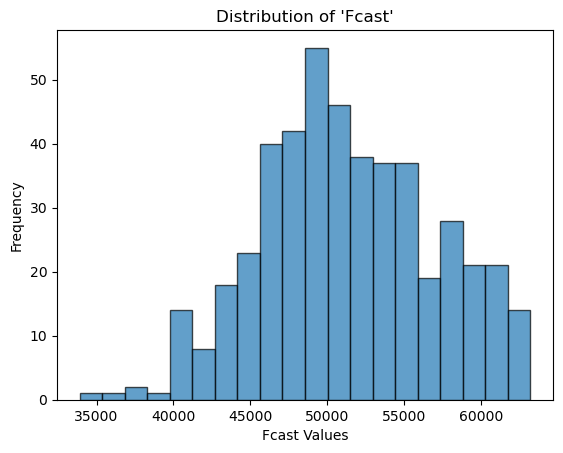

In [14]:
fcast = Data_clean['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=20, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

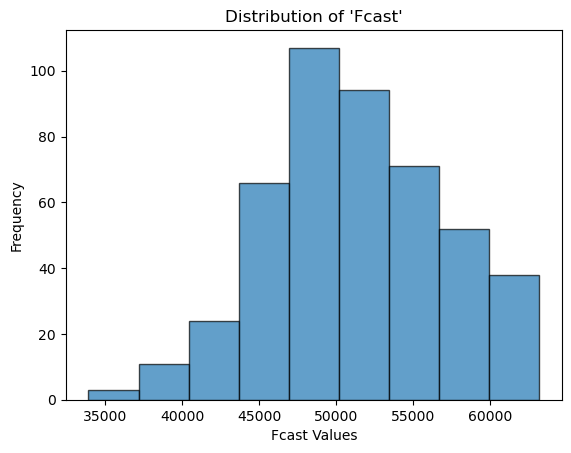

Sturges' Formula bins: 9
Freedman-Diaconis Rule bins: 15


In [15]:
N = len(fcast)
data_range = np.ptp(fcast)

# Calculate the optimal number of bins using Sturges' Formula
sturges_bins = int(np.ceil(np.log2(N + 1)))

# Calculate the optimal number of bins using the Freedman-Diaconis Rule
iqr = stats.iqr(fcast)
fd_bins = int(np.ceil(data_range / (2 * (iqr / (N ** (1/3))))))

# Creating the bar chart
plt.hist(fcast, bins=sturges_bins, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

# Print the number of bins calculated using different methods
print("Sturges' Formula bins:", sturges_bins)
print("Freedman-Diaconis Rule bins:", fd_bins)

In [16]:
filtered_df = Data_clean[Data_clean['Fcast'] < 40000]

# Display the filtered rows
print(filtered_df)

       Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
331  37700.0  3343  2119  2081  2693  1897  2273  1625  2561  2299  2166   
332  36700.0  3170  2371  2067  2630  1888  2117  1574  2390  2261  2091   
333  39800.0  3389  3471  2200  2700  2052  2416  1857  2467  2419  2230   
497  37054.0  3481  3248  2148  2615  1930  5609  2494  5464  2393  1843   
498  33900.0  3394  3003  2081  2605  1877  4851  2294  4132  2365  1759   
574  39966.0  3170  2819  2323  2547  2154  4749  2338  6318  2226  1740   
650  39100.0  3668  3623  2740  2710  2083  3230  2083  3423  2189  2332   

       CB      RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OKW   JAM  \
331  2588  1525.0  1522  5327  3897   1723   4467   4984  3135  2103  2324   
332  2319  1509.0  1554  5056  3780   1597   4219   4810  3229  2243  2329   
333  2565  1554.0  1592  5664  4293   2085   4533   5042  3678  2289  2557   
497  4513  2046.0  1353  7739  6577   4620   5139   5729  4404  2590  2770   
4

In [17]:
filtered_df = Data_clean.drop(Data_clean[Data_clean['Fcast'] < 40000].index)

filtered_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,40200.0,3408,3248,2279,2830,2203,3356,2024,3005,2252,2237,4407,2165.000000,1289,6092,4953,3752,4454,5226,3584,2769,2651,1808,0,1,0,0,0,0,0
646,42400.0,3753,3455,2413,2868,2255,3361,2116,4076,2322,2418,4429,2212.000000,1335,6273,5298,3334,4637,5135,4207,3122,2737,1927,0,0,0,0,0,1,0
647,41700.0,3900,3384,2739,2790,2231,3229,2085,4254,2232,2451,4426,2236.000000,1365,6215,5359,3141,4485,5230,3639,2844,2678,1930,0,0,0,0,0,0,1
648,41400.0,3800,3582,2712,2827,2166,3259,2097,4393,2199,2391,4410,2265.000000,1609,6121,5356,3130,4136,5320,3400,2748,2732,1852,0,0,0,0,1,0,0


In [18]:
num_bootstrap_samples = 7

# Create an empty DataFrame to store the bootstrap samples
bootstrap_df = pd.DataFrame()

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the DataFrame
    bootstrap_sample = filtered_df.sample(n=len(filtered_df), replace=True)
    
    # Concatenate the bootstrap sample with the bootstrap DataFrame
    bootstrap_df = pd.concat([bootstrap_df, bootstrap_sample], ignore_index=True)

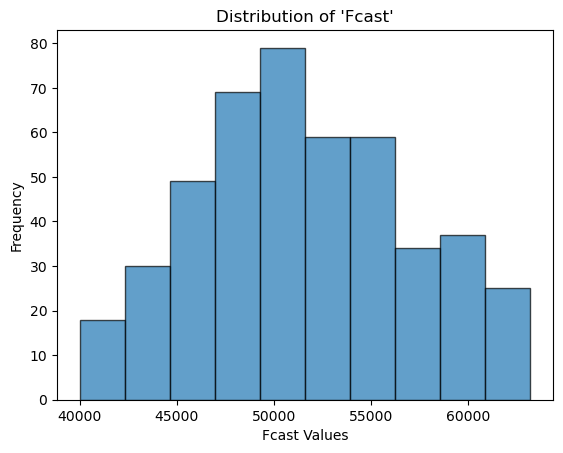

In [19]:
fcast = filtered_df['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

In [20]:
print(bootstrap_df)

        Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
0     54100.0  3517  3746  2350  2542  1784  5869  2558  5341  2545  1967   
1     47900.0  3294  3883  2077  2642  2263  5679  2532  6098  2458  1923   
2     62900.0  3861  5155  2977  2861  1934  6799  2945  6843  2937  2659   
3     54500.0  3740  4869  2544  3044  2516  5877  2967  5375  2992  2822   
4     56500.0  3498  3719  2283  2656  2040  6149  2617  4246  2250  2056   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3208  56000.0  3578  4863  2639  2987  2356  5551  2817  5592  2971  2900   
3209  44400.0  3439  3369  2313  2584  2129  5366  2445  6153  2372  1873   
3210  47900.0  3622  3751  2741  2840  2405  4293  2553  3189  2383  2447   
3211  55700.0  3511  3690  2179  2638  2004  6095  2616  4058  2061  1953   
3212  43100.0  3420  3013  2119  2576  1856  4485  2115  3630  2329  1739   

        CB           RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OKW 

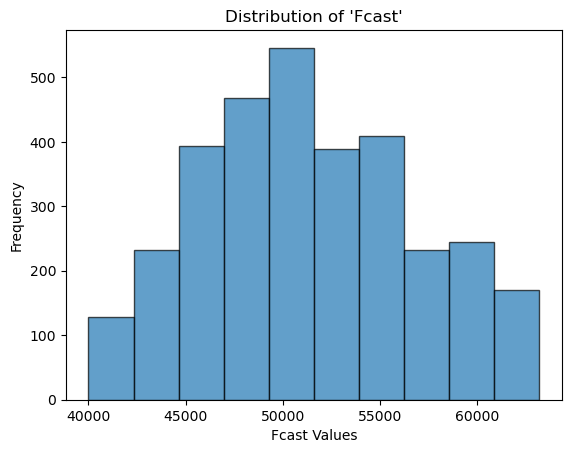

Normality test p-value: 3.52557408460388e-39
The data does not follow a normal distribution.


In [21]:
fcast = bootstrap_df['Fcast']

# Creating a histogram
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the histogram
plt.show()

# Perform a normality test
stat, p_value = stats.normaltest(fcast)

# Set the significance level
alpha = 0.05

# Print the results
print("Normality test p-value:", p_value)
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

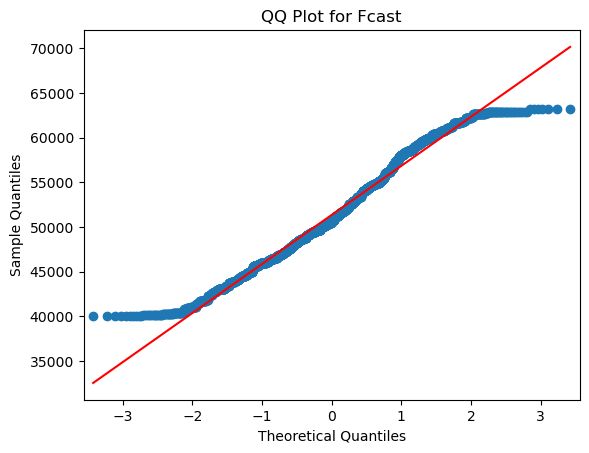

In [22]:
fcast_values = np.array(bootstrap_df['Fcast'])
sm.qqplot(fcast_values, line='s')
plt.title('QQ Plot for Fcast')
plt.show()

In [23]:
filtered_df = bootstrap_df

In [24]:
######TEST DATASPLIT AND MODELS#######

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=1)

In [26]:
train_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
47,62600.0,3742,4534,2855,2799,1919,6428,2746,5254,2930,2692,4229,2319.000000,1904,7827,7217,4276,5068,5437,5107,3052,3474,2004,0,0,0,0,0,1,0
1776,51200.0,3578,4089,2531,2697,1726,4448,2101,4216,2659,2078,3771,2249.000000,1676,7299,5786,2310,4495,4811,4644,2907,2328,1932,1,0,0,0,0,0,0
921,58309.0,3706,3939,2625,2817,2394,4618,2645,4308,2190,2328,4746,2311.000000,1503,8022,6799,2936,4601,5509,4729,2981,3195,1954,0,0,0,0,0,1,0
2920,52600.0,3539,4330,2283,2709,2188,4119,2336,4619,2515,2565,3974,3410.477315,1468,6440,5010,2359,4796,5207,4457,2570,3100,1891,0,0,0,0,0,1,0
58,44842.0,3157,1928,2035,2549,2072,2328,2054,4184,1768,1999,3706,1881.000000,1158,6907,4585,3382,4571,4624,3262,2412,2103,1709,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,57600.0,3547,4450,2776,3058,2493,6599,2856,6092,3016,2902,4917,3720.830920,2035,8196,7341,3180,4986,5573,5155,2978,3617,2002,0,0,0,0,0,0,1
905,50104.0,3123,3516,2000,2600,1761,5572,2575,3998,2365,1863,4379,1802.000000,1445,7253,6897,1737,2924,4451,4230,2518,3177,1735,0,0,0,0,0,1,0
1096,61000.0,3864,4717,2656,2912,2479,6020,2876,5265,3063,2824,4714,3626.366774,1980,7746,6916,3522,5202,5609,5117,3020,3592,2060,0,1,0,0,0,0,0
235,50400.0,3837,4599,2666,2960,2353,4613,2423,5009,2781,2578,4233,3509.116754,1651,6159,4165,2512,5251,5986,5044,3018,3009,2033,1,0,0,0,0,0,0


In [27]:
test_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1721,50600.0,3099,3528,2071,2604,1783,3984,2192,5103,2348,1837,4150,1992.000000,1241,7203,6492,3328,4621,5005,4371,2672,2698,1842,0,0,0,0,1,0,0
2746,50100.0,3298,3776,2378,2635,2218,5571,2580,5501,2395,2261,4473,3360.495738,1511,7527,6926,2962,4212,5070,4133,2475,3181,1795,0,0,0,0,0,0,1
171,50000.0,3628,4304,2394,2744,1861,5987,2513,5515,2668,1958,4148,2195.000000,1612,7549,6850,4418,5260,5134,4603,2794,3275,1956,0,0,0,1,0,0,0
2371,47800.0,3472,3611,2500,2518,1620,3494,1944,3863,2556,1904,3581,2027.000000,1678,7107,5377,1856,4125,4587,4478,2668,2149,1832,0,0,0,0,1,0,0
700,49200.0,3839,3721,2703,2827,2475,5011,2410,5225,2173,2384,4529,2273.000000,1717,8309,6315,2670,4412,5362,4406,2984,2935,1931,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,47200.0,3218,3578,2194,2581,2203,5136,2468,3912,2635,2232,4227,1576.000000,1637,6947,6249,3172,4678,5161,4377,2606,3175,1836,0,0,0,0,1,0,0
1263,58900.0,3768,4579,2610,3009,2501,6129,2919,5691,3053,2795,4787,4264.949791,1990,7675,7237,3164,4601,5639,4812,2968,3462,2061,0,0,0,0,0,0,1
979,59700.0,3802,4697,2625,2936,2435,5499,2583,5367,2895,2881,4659,3869.182931,1780,7717,6580,3504,5225,5307,5123,3088,3316,2035,0,0,1,0,0,0,0
2163,59155.0,3639,4878,2495,2944,2513,6068,2768,6499,3006,2621,4717,4460.119925,1962,7836,6639,3568,4887,5445,4745,2852,3393,1966,1,0,0,0,0,0,0


In [28]:
X_train=train_df.copy()
X_train.drop(['Fcast'], axis=1, inplace=True)
Y_train=train_df[['Fcast']].copy()
X_test=test_df.copy()
X_test.drop(['Fcast'], axis=1, inplace=True)
Y_test=test_df[['Fcast']].copy()

In [29]:
X_train

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
47,3742,4534,2855,2799,1919,6428,2746,5254,2930,2692,4229,2319.000000,1904,7827,7217,4276,5068,5437,5107,3052,3474,2004,0,0,0,0,0,1,0
1776,3578,4089,2531,2697,1726,4448,2101,4216,2659,2078,3771,2249.000000,1676,7299,5786,2310,4495,4811,4644,2907,2328,1932,1,0,0,0,0,0,0
921,3706,3939,2625,2817,2394,4618,2645,4308,2190,2328,4746,2311.000000,1503,8022,6799,2936,4601,5509,4729,2981,3195,1954,0,0,0,0,0,1,0
2920,3539,4330,2283,2709,2188,4119,2336,4619,2515,2565,3974,3410.477315,1468,6440,5010,2359,4796,5207,4457,2570,3100,1891,0,0,0,0,0,1,0
58,3157,1928,2035,2549,2072,2328,2054,4184,1768,1999,3706,1881.000000,1158,6907,4585,3382,4571,4624,3262,2412,2103,1709,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,3547,4450,2776,3058,2493,6599,2856,6092,3016,2902,4917,3720.830920,2035,8196,7341,3180,4986,5573,5155,2978,3617,2002,0,0,0,0,0,0,1
905,3123,3516,2000,2600,1761,5572,2575,3998,2365,1863,4379,1802.000000,1445,7253,6897,1737,2924,4451,4230,2518,3177,1735,0,0,0,0,0,1,0
1096,3864,4717,2656,2912,2479,6020,2876,5265,3063,2824,4714,3626.366774,1980,7746,6916,3522,5202,5609,5117,3020,3592,2060,0,1,0,0,0,0,0
235,3837,4599,2666,2960,2353,4613,2423,5009,2781,2578,4233,3509.116754,1651,6159,4165,2512,5251,5986,5044,3018,3009,2033,1,0,0,0,0,0,0


In [30]:
Y_train

,Fcast
47,62600.0
1776,51200.0
921,58309.0
2920,52600.0
58,44842.0
...,...
2763,57600.0
905,50104.0
1096,61000.0
235,50400.0


In [31]:
X_test

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1721,3099,3528,2071,2604,1783,3984,2192,5103,2348,1837,4150,1992.000000,1241,7203,6492,3328,4621,5005,4371,2672,2698,1842,0,0,0,0,1,0,0
2746,3298,3776,2378,2635,2218,5571,2580,5501,2395,2261,4473,3360.495738,1511,7527,6926,2962,4212,5070,4133,2475,3181,1795,0,0,0,0,0,0,1
171,3628,4304,2394,2744,1861,5987,2513,5515,2668,1958,4148,2195.000000,1612,7549,6850,4418,5260,5134,4603,2794,3275,1956,0,0,0,1,0,0,0
2371,3472,3611,2500,2518,1620,3494,1944,3863,2556,1904,3581,2027.000000,1678,7107,5377,1856,4125,4587,4478,2668,2149,1832,0,0,0,0,1,0,0
700,3839,3721,2703,2827,2475,5011,2410,5225,2173,2384,4529,2273.000000,1717,8309,6315,2670,4412,5362,4406,2984,2935,1931,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,3218,3578,2194,2581,2203,5136,2468,3912,2635,2232,4227,1576.000000,1637,6947,6249,3172,4678,5161,4377,2606,3175,1836,0,0,0,0,1,0,0
1263,3768,4579,2610,3009,2501,6129,2919,5691,3053,2795,4787,4264.949791,1990,7675,7237,3164,4601,5639,4812,2968,3462,2061,0,0,0,0,0,0,1
979,3802,4697,2625,2936,2435,5499,2583,5367,2895,2881,4659,3869.182931,1780,7717,6580,3504,5225,5307,5123,3088,3316,2035,0,0,1,0,0,0,0
2163,3639,4878,2495,2944,2513,6068,2768,6499,3006,2621,4717,4460.119925,1962,7836,6639,3568,4887,5445,4745,2852,3393,1966,1,0,0,0,0,0,0


In [32]:
Y_test

,Fcast
1721,50600.0
2746,50100.0
171,50000.0
2371,47800.0
700,49200.0
...,...
774,47200.0
1263,58900.0
979,59700.0
2163,59155.0


In [33]:
X_train=X_train.values
Y_train=Y_train.values.reshape(-1)
X_test=X_test.values
Y_test=Y_test.values.reshape(-1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler=MinMaxScaler()
#_train_s = scaler.fit_transform(X_train)
#_test_s = scaler.transform(X_test)

#_train_s.shape

In [35]:
#X_train = X_train_s
#X_test = X_test_s

#X_train=X_train_s
#X_test=X_test_s

In [36]:
#idx_list=np.arange(0, X_train.shape[0])
#train_idx=idx_list[0:468]
#val_idx=idx_list[468:]

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [37]:
#Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=150, random_state= 100)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred = model.predict(X_test)
Val_pred = model.predict(X_val)

# Evaluate the model 
KNNMSE = np.mean((Y_test - Y_test_pred)**2)
KNNMAE = np.mean(np.abs(Y_test - Y_test_pred))
KNNMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE = np.mean((Y_val - Val_pred)**2)
KNNMAE = np.mean(np.abs(Y_val - Val_pred))
KNNMAPE =  np.mean(np.abs(Y_val - Val_pred)/Y_val)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE= 84430.2289630552
KNNMAE= 117.81771902540183
KNNMAPE= 0.0022409510167149815
KNNMSE= 90338.77484254229
KNNMAE= 123.12832684824906
KNNMAPE= 0.002333735709922271


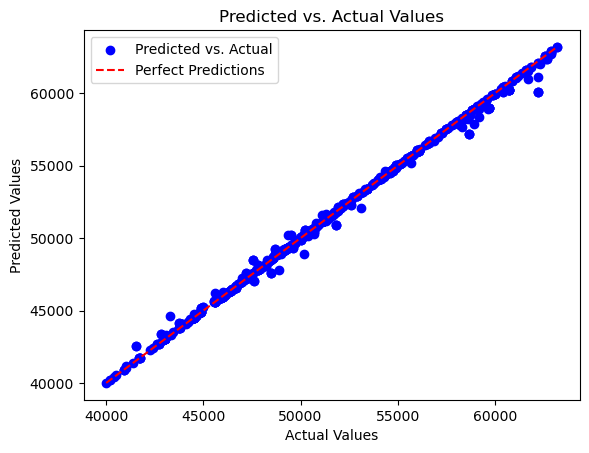

In [38]:
plt.scatter(Y_test, Y_test_pred, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [ ]:
#####TEST ON NEW DATASET#####

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(Y_test, dt_preds)

# Evaluate the model 
KNNMSE = np.mean((Y_test - dt_preds)**2)
KNNMAE = np.mean(np.abs(Y_test - dt_preds))
KNNMAPE =  np.mean(np.abs(Y_test - dt_preds)/Y_test)
print('DTMSE=', KNNMSE)
print('DTMAE=', KNNMAE)
print('DTMAPE=', KNNMAPE)

DTMSE= 210220.26127527218
DTMAE= 36.04665629860031
DTMAPE= 0.0007361767667587662


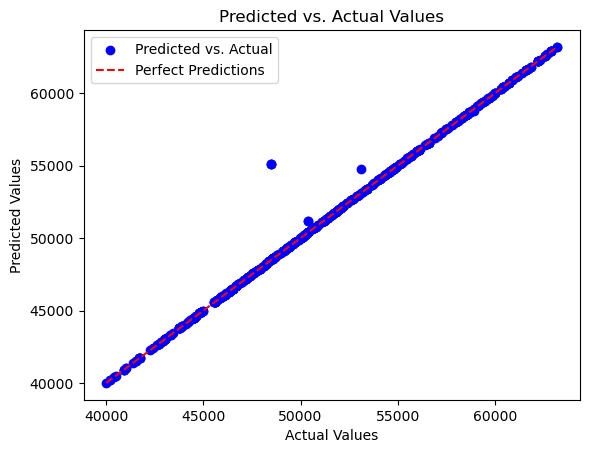

In [40]:
plt.scatter(Y_test, dt_preds, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task with squared error loss
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
predictions = model.predict(dtest)

# Evaluate the model using RMSE
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
XGMSE = np.mean((Y_test - predictions)**2)
XGMAE = np.mean(np.abs(Y_test - predictions))
XGMAPE =  np.mean(np.abs(Y_test - predictions)/Y_test)
print('XGMSE=', XGMSE)
print('XGMAE=', XGMAE)
print('XGMAPE=', XGMAPE)

Root Mean Squared Error (RMSE): 176.8428990275418
XGMSE= 31273.410936465345
XGMAE= 34.57316776827372
XGMAPE= 0.000680479631080124


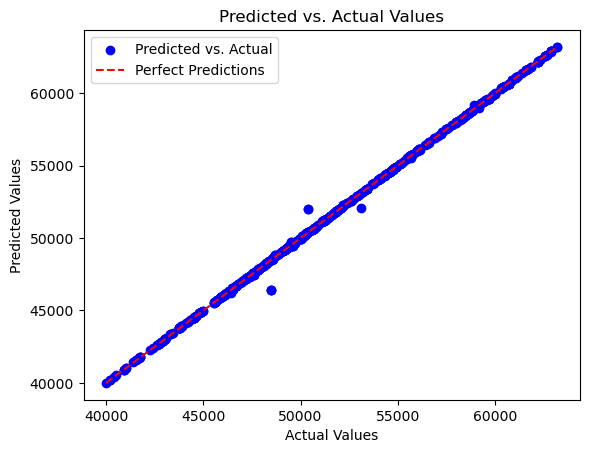

In [42]:
plt.scatter(Y_test, predictions, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [43]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


NameError: name 'layers' is not defined